In [81]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [33]:
promoter = np.load('./seq/promoter.npy')
expression = np.load('./seq/gene_expression.npy')
expression = [float(x) for x in expression]
log_expression = [np.log2(x) for x in expression]

In [35]:
# 11k proms of length 50bp
print(promoter.shape)
print(len(expression))

print(min([len(x) for x in promoter]))


(11884,)
11884
50


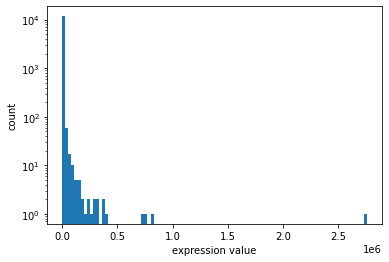

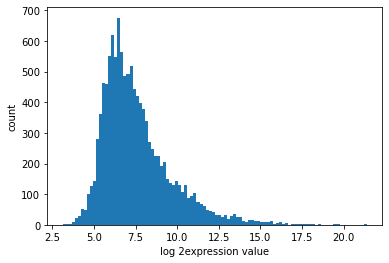

In [37]:
plt.hist(expression,bins=100)
plt.yscale('log')
plt.xlabel('expression value')
plt.ylabel('count')
plt.show()

plt.hist(log_expression,bins=100)
#plt.yscale('log')
plt.xlabel('log 2expression value')
plt.ylabel('count')
plt.show()

In [24]:
sorted(expression,reverse=True)

[2755441.06,
 820796.7,
 745147.58,
 724334.04,
 390218.55,
 377468.69,
 377244.85,
 307972.49,
 307832.17,
 281907.24,
 280522.84,
 264960.13,
 242006.66,
 239164.33,
 194847.69,
 176565.4,
 168895.73,
 165173.72,
 156050.44,
 148783.16,
 147183.6,
 142872.71,
 137042.03,
 130662.93,
 127038.76,
 119409.08,
 117419.55,
 102054.38,
 102050.45,
 99257.59,
 97976.84,
 97970.06,
 94127.51,
 90223.65,
 89683.62,
 84724.58,
 84251.48,
 81565.12,
 79189.46,
 78097.8,
 75018.68,
 74438.69,
 74060.08,
 73959.44,
 71788.19,
 71764.13,
 68889.73,
 68877.71,
 65877.92,
 64757.89,
 62913.02,
 61941.08,
 60438.9,
 55130.71,
 55013.7,
 53564.22,
 53278.22,
 53245.51,
 52469.36,
 51683.85,
 50139.6,
 49207.53,
 48996.49,
 48965.29,
 48485.92,
 48382.98,
 48362.35,
 47889.69,
 47801.35,
 47794.21,
 47715.03,
 46266.98,
 44979.21,
 44948.79,
 44272.54,
 42995.7,
 42518.09,
 42141.8,
 41483.94,
 41295.92,
 41217.74,
 40573.72,
 39444.35,
 38803.6,
 38715.02,
 38423.54,
 38012.7,
 37253.11,
 36580.74,
 3

/home/ubuntu/anaconda3/envs/torchp/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


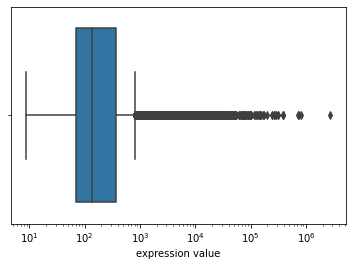

/home/ubuntu/anaconda3/envs/torchp/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


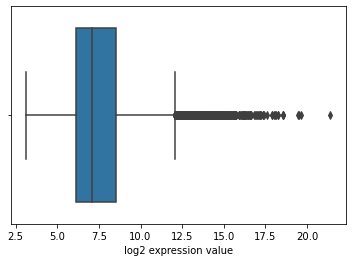

In [38]:
sns.boxplot(expression)
plt.xlabel("expression value")
plt.xscale('log')
plt.show()

sns.boxplot(log_expression)
plt.xlabel("log2 expression value")
plt.show()

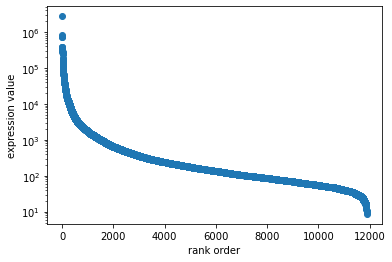

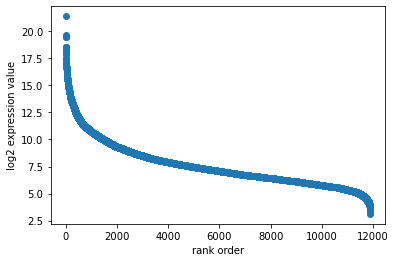

In [39]:
plt.scatter(np.arange(0,len(expression)),sorted(expression,reverse=True))
plt.ylabel('expression value')
plt.xlabel('rank order')
plt.yscale('log')
plt.show()

plt.scatter(np.arange(0,len(log_expression)),sorted(log_expression,reverse=True))
plt.ylabel('log2 expression value')
plt.xlabel('rank order')
#plt.yscale('log')
plt.show()

In [40]:
# makes their train split with 10,000 - not a percentage split

In [42]:
# are the promoters in promoter.npy the same as the predict?
set(promoter)

{'tgaggatgcggtggctttattgacctgtaccgcagtcgttatattaacgc',
 'aaaccgtggaagagcacgcggcaaaacatgccgggcagtatgatgtggtg',
 'agcgcggtaaataaggaaagagaattgactccggagtgtacaattattac',
 'tgctggtatcgcaattcgctctctcccttcgccttacttattatttggcg',
 'ttgtgcataaaaacagggcgtcacgccctgttttgcattacggtggtgca',
 'caatcaaaacctgtatggacataaggtgaatactttgttactttagcgtc',
 'gtgaccgatgccaacctgaatattctggcagaagggccgaccattgcagt',
 'gactaccagcgcgatagccatcatcaattcaaactgagtatcatcgacgg',
 'ttacgtaatgaaccaggcatcctttctcccacaaatatctagacttaagt',
 'aaactaaatccctcaccttccggctcaaagaacagcgtttccagtccagc',
 'agccagaaaaagccaatgcccagcaacatcggttggataaaatcacccac',
 'acggacatgtaattttgataacgaacaacgttgacctttgttacaattag',
 'gcctgcgctttcgctaactgatgcagaaccgtttgtagtacgttgttggc',
 'ccagttccgatcgtctgcaggaaaactcactgtttgatatcgtcaacact',
 'tccagacgtgaatttgctggctctcagggctggcgatataaactgtttgc',
 'agagatgtctacgtttgaaattgagcaacagttactggaacaatttctgc',
 'gacatcgtgctggtcagcgaagacgaaatcagaaacagtatgattgcctt',
 'tattgcaacaatatatttacttatatttaactataaaacaccatttcagt',
 'tgagtttt

In [53]:
with open('./seq/predicted_promoters.fa','r') as f:
    text = f.read()
    lines = text.split('>')
    seqs = [x.strip().split('\n') for x in lines][1:]
    
seqs

[['0', 'CTCCCTGAAAAACCGAAGAAATGCCTGTTGCATATGAGTACACTGATAAC'],
 ['1', 'GGCATTCAAGGTGTACGTCAAAGAAAAAGTTTTCGTGTTATGCTATAAAT'],
 ['2', 'CTTCAGCTTCTTATGTTTCAATGCGGCAAGAGATTGCCGAAAATGTTATC'],
 ['3', 'CACCAACCTCAGCAACTTAGATTGAGTTAATTATTTACGGCGATTTCCGC'],
 ['4', 'CGGTCACCCTGATTCAACCATTATTGGTATGTAAACAGTGTGAAAATATG'],
 ['5', 'GATGCGCACAACTCCCCATTCATTAGGCAAACCGTATGTGTTAGCGACTT'],
 ['6', 'ATAACCCACGAAGTGTGCGACGCCGCATTGTCATTGAGATATTTACTAAA'],
 ['7', 'AGGTGCAGCCACCTTATGTAGTAAGAATCTCGTGGGTGATTAGGCATATT'],
 ['8', 'CAGGCGCACGCGTTCTAATTGATCCATAAAACTATCTGATTATTAGTCGG'],
 ['9', 'TTCAGGATGTTTCCAAGACTAGGCTGGTGCAGAGTATCATTATGGCATGT'],
 ['10', 'ATTCGTGCGCATCCACTGGAAAATAACGTATTGTTGCTGATGCCTCTGAC'],
 ['11', 'AGCGCAGGCTAACGTAGAAAGGAAAGCCACATTGCCCGGATAATGCCGGC'],
 ['12', 'TTGGCAAAAATACTTCTTAAACTTTTCTAATTTCTTACGATAAAAATCTC'],
 ['13', 'TTATAACAGAATAATTGCAAGATTGAAGCCGTCAGGCATGATGCGAACGC'],
 ['14', 'TGAATGTCGGGTACCTGAATGGTATGCAGCATTATGGGAATTCATTTATT'],
 ['15', 'ATTAAGGTTGACGTAATGGAGAATCATTGCGAATTGCCAAGATTTTGTGC'],
 [

In [54]:
seqs[-5:]

[['9995', 'CCTTACTTGGTAAGCGTATGTTGAGAAACAGGTCCGGTAAACTGACTCCC'],
 ['9996', 'CCTTTGATGCTGGCCTCTGCGAATTTTACCATTTCCTTATTCTTTTTTAC'],
 ['9997', 'AAAGGATTGTCGGTACCGGTGTTCCCTCAATGCGAATTACTGCTTCAAGT'],
 ['9998', 'GCTGCCACGTTATCCTTGATCGAACGCATGAAAAATGATATTATCCAATT'],
 ['9999', 'TGTAATGTAAAAGCTCCGAAATGGTTAAAATCGGCGGCGCAAACAACGCC']]

In [55]:
len(seqs)

10000

In [63]:
seq_set = set([x[1] for x in seqs])
seq_set

{'ATGAGGTTCTCTCCCGGTGTGAAAGCACTCGTATCATTTAGCATGATTGC',
 'ACTGTCGAATGAGCTGCTCAATAGTTTATGATTTCCGATACCGCTAAATA',
 'AATTACTCCAGATTTTTCCGATAAAGTGTGCTGTGGTTAAGATTATGATC',
 'GTGGTGCCGCCAATTGCTTATATTAGTAAATATAGTGGTGTTATCACCTC',
 'CGGGTGGGTGAAGGTTGTTCATTTTTGGTGCTTTATAGTAAAATAATTAA',
 'CCGGGGTTTTTTAATGCTGCACGTTATGCTTGCCCTGTGATACCATTTCC',
 'AGGCAACAGGCACGTGACGCTGAGCATAAATATGTTGGCACCATTTTAAG',
 'TGATGTGGAAAGCAACCGCCATTATTATAAGGAGATGCGATATTTACGTT',
 'TAGAACTGCAGACTTTTGCTGCCGGGAAATGGCAAATGATGCTGCCTGCC',
 'TACTGGGGCGAAACTTGCCTGATAAACTCGTTAGTGAGTATTTATCAGGT',
 'CCGTCGCCAGCAGCGCCGAGTGATTTAAGACGCTCGACTACGTGTTGAAT',
 'ACCCGGTGCAGGTACTGCGAAAGCTTCACGCTCTATTGTTTAATGGTGCG',
 'GCATGTTGAGCGAACGCGTTTTCCTCACAGCGTGGCGTTATCTTTATCGG',
 'TTATTTAGCACCTGTTCAGACTTACTATTGGTGTTACTGATAATTTTCAG',
 'CATGACCTTTCTCCTTTGATAACGGGTTACGGCACGCTGAATCTTATTGA',
 'GACAGGCGGGATGGCCTGCTGGTGCGCACCTGCCATATTATTGTTAAGCC',
 'CAATTATGCGTATGCTGCACGTTCTGCAACAATAGGATAAACATTATGGT',
 'TTGTTAGGAATAAGTTCAGGTCAGTTAAGTGTTGCGCGATAATATTTAAT',
 'TGCCCGGT

In [60]:
promoter = set([x.upper() for x in promoter])

In [61]:
len(promoter)

11884

In [65]:
promoter.intersection(seq_set)

# no intersection between the promoter.npy file and the predicted_promoters.fa file? What are these then?

set()

In [66]:
promoter[1]

TypeError: 'set' object is not subscriptable

In [67]:
ss1 = 'TAGAACTGCAGACTTTTGCTGCCGGGAAATGGCAAATGATGCTGCCTGCC'
len(ss1)

50

In [68]:
p1 = 'gactaccagcgcgatagccatcatcaattcaaactgagtatcatcgacgg'

In [69]:
len(p1)

50

In [77]:
test = 'CCTTATGAAGTTGCCGAGATACGTCCCCAGGTGGGCGGTATTATCATTAA'

In [78]:
[x for x in promoter if test in x]

['CCTTATGAAGTTGCCGAGATACGTCCCCAGGTGGGCGGTATTATCATTAA']

In [79]:
[x for x in seq_set if test in x]

[]

In [86]:
tdf = pd.read_csv('thomason.tsv',sep='\t').fillna('')
tdf.head()

,Pos,Strand,detCount,Condition,detected,enriched,stepHeight,stepFactor,enrichmentFactor,classCount,...,Secondary,Internal,Antisense,Automated,Manual,Putative sRNA,Putative asRNA,Comment,Sequence -50 nt upstream + TSS (51nt),Overlap with RegulonDB
0,38,+,1,M63_0.4,0,0,,,,1,...,1,0,0,1,0,0,0,,,X
1,38,+,1,LB_0.4,0,0,,,,1,...,1,0,0,1,0,0,0,,,X
2,38,+,1,LB_2.0,1,1,8.43,>100,9.63,1,...,1,0,0,1,0,0,0,,,X
3,113,+,3,M63_0.4,1,1,1.8,4,25.41,1,...,1,0,0,1,0,0,0,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,
4,113,+,3,LB_0.4,1,1,1.96,2.33,13.27,1,...,1,0,0,1,0,0,0,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,


In [87]:
tdf.shape

(52335, 25)

In [93]:
tdf[(tdf['Primary']==1) | tdf['Secondary']==1]

,Pos,Strand,detCount,Condition,detected,enriched,stepHeight,stepFactor,enrichmentFactor,classCount,...,Secondary,Internal,Antisense,Automated,Manual,Putative sRNA,Putative asRNA,Comment,Sequence -50 nt upstream + TSS (51nt),Overlap with RegulonDB
0,38,+,1,M63_0.4,0,0,,,,1,...,1,0,0,1,0,0,0,,,X
1,38,+,1,LB_0.4,0,0,,,,1,...,1,0,0,1,0,0,0,,,X
2,38,+,1,LB_2.0,1,1,8.43,>100,9.63,1,...,1,0,0,1,0,0,0,,,X
3,113,+,3,M63_0.4,1,1,1.8,4,25.41,1,...,1,0,0,1,0,0,0,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,
4,113,+,3,LB_0.4,1,1,1.96,2.33,13.27,1,...,1,0,0,1,0,0,0,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52301,4638395,-,3,LB_0.4,1,1,5.64,3.09,2.23,2,...,0,0,0,1,0,0,1,,GCAATTACGTACTTTAGTCATGTTACGCCGATCATGTTAATTTGCA...,
52303,4638395,-,3,LB_2.0,1,0,4.0,2.38,1.52,2,...,0,0,0,1,0,0,1,,GCAATTACGTACTTTAGTCATGTTACGCCGATCATGTTAATTTGCA...,
52314,4638684,+,2,M63_0.4,1,0,0.77,5,1.16,1,...,0,0,0,1,0,0,0,,ACGTTAACAGTTTGATGAAATCATCGTATCTAAATGCTAGCTTTCG...,
52315,4638684,+,2,LB_0.4,0,0,,,,1,...,0,0,0,1,0,0,0,,ACGTTAACAGTTTGATGAAATCATCGTATCTAAATGCTAGCTTTCG...,


In [95]:
tdf[tdf['Overlap with RegulonDB'] == 'X']

,Pos,Strand,detCount,Condition,detected,enriched,stepHeight,stepFactor,enrichmentFactor,classCount,...,Secondary,Internal,Antisense,Automated,Manual,Putative sRNA,Putative asRNA,Comment,Sequence -50 nt upstream + TSS (51nt),Overlap with RegulonDB
0,38,+,1,M63_0.4,0,0,,,,1,...,1,0,0,1,0,0,0,,,X
1,38,+,1,LB_0.4,0,0,,,,1,...,1,0,0,1,0,0,0,,,X
2,38,+,1,LB_2.0,1,1,8.43,>100,9.63,1,...,1,0,0,1,0,0,0,,,X
9,148,+,3,M63_0.4,1,1,831.14,16.97,2.9,1,...,0,0,0,1,0,0,0,,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...,X
10,148,+,3,LB_0.4,1,1,64.53,10.9,2.62,1,...,0,0,0,1,0,0,0,,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52258,4633266,+,3,LB_2.0,1,1,3.71,>100,3.43,2,...,0,0,0,1,0,0,1,,TCTGTAAGTGCCACTTGGAATAACCTGCTTTCGCCGCTACATTGTC...,X
52259,4633266,+,3,LB_2.0,1,1,3.71,>100,3.43,2,...,0,0,1,1,0,0,1,,TCTGTAAGTGCCACTTGGAATAACCTGCTTTCGCCGCTACATTGTC...,X
52260,4633376,-,3,M63_0.4,1,1,999.63,>100,9.81,1,...,0,0,0,1,0,0,0,,AAGAAAAAAACACTGAATGCTAAAACAGCAAAAAATGCTATTATCC...,X
52261,4633376,-,3,LB_0.4,1,1,997.79,>100,20.87,1,...,0,0,0,1,0,0,0,,AAGAAAAAAACACTGAATGCTAAAACAGCAAAAAATGCTATTATCC...,X


In [96]:
tdf.columns

Index(['Pos', 'Strand', 'detCount', 'Condition', 'detected', 'enriched',
       'stepHeight', 'stepFactor', 'enrichmentFactor', 'classCount',
       'Locus_tag', 'Product', 'UTRlength', 'GeneLength', 'Primary',
       'Secondary', 'Internal', 'Antisense', 'Automated', 'Manual',
       'Putative sRNA', 'Putative asRNA', 'Comment',
       'Sequence -50 nt upstream + TSS (51nt)', 'Overlap with RegulonDB'],
      dtype='object')

In [104]:
th_seqs = tdf[tdf['Sequence -50 nt upstream + TSS (51nt)'] != ""]['Sequence -50 nt upstream + TSS (51nt)'].values
th_seqs = set([x[:-1] for x in th_seqs]) # subtract off last base

In [108]:
inter = th_seqs.intersection(promoter)
len(inter)

11884

In [109]:
len(th_seqs)

14679

In [115]:
th_filt_seqs = tdf[tdf['Condition']=='LB_2.0']['Sequence -50 nt upstream + TSS (51nt)'].values

In [116]:
len(th_filt_seqs)

17445

In [117]:
tdf.describe()

,Pos,detCount,detected,enriched,classCount,Primary,Secondary,Internal,Antisense,Automated,Manual,Putative sRNA,Putative asRNA
count,5.233500e+04,52335.000000,52335.00000,52335.000000,52335.000000,52335.000000,52335.000000,52335.000000,52335.000000,52335.0,52335.0,52335.0,52335.000000
mean,2.356191e+06,2.186071,0.72869,0.659520,1.214044,0.153167,0.091086,0.319977,0.406764,1.0,0.0,0.0,0.457896
std,1.351459e+06,0.793721,0.44464,0.473875,0.413502,0.360152,0.287735,0.466472,0.491235,0.0,0.0,0.0,0.498229
min,3.800000e+01,1.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000
25%,1.173028e+06,2.000000,0.00000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000
50%,2.417319e+06,2.000000,1.00000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.0,0.0,0.000000
75%,3.523591e+06,3.000000,1.00000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.0,0.0,0.0,1.000000
max,4.639136e+06,3.000000,1.00000,1.000000,3.000000,1.000000,1.000000,1.000000,1.000000,1.0,0.0,0.0,1.000000


In [123]:
tdf[['Pos','Sequence -50 nt upstream + TSS (51nt)']].drop_duplicates()

,Pos,Sequence -50 nt upstream + TSS (51nt)
0,38,
3,113,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...
6,122,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...
9,148,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...
12,412,CATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCT...
...,...,...
52320,4638826,GTCGCAGAAAAAGCCCTTTACTTAGCTTAAAAAAGGCTAAACTATT...
52323,4638991,TATTTGATCAAGAAGAGTGGCAATATGCGTATAACGATTATTCTGG...
52326,4639029,GTGCCTGACTATCGACAATCCGCAGATCGCTAAACCCCATCGTTTT...
52329,4639123,TCGTGTAACGATTCAGCCAATGTCGGGAAAACTTTAATATTATCAA...


In [125]:
# 14868 TSS candidates from thomason
14868 - 5574

9294

In [126]:
tdf.head(20)

,Pos,Strand,detCount,Condition,detected,enriched,stepHeight,stepFactor,enrichmentFactor,classCount,...,Secondary,Internal,Antisense,Automated,Manual,Putative sRNA,Putative asRNA,Comment,Sequence -50 nt upstream + TSS (51nt),Overlap with RegulonDB
0,38,+,1,M63_0.4,0,0,,,,1,...,1,0,0,1,0,0,0,,,X
1,38,+,1,LB_0.4,0,0,,,,1,...,1,0,0,1,0,0,0,,,X
2,38,+,1,LB_2.0,1,1,8.43,>100,9.63,1,...,1,0,0,1,0,0,0,,,X
3,113,+,3,M63_0.4,1,1,1.8,4,25.41,1,...,1,0,0,1,0,0,0,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,
4,113,+,3,LB_0.4,1,1,1.96,2.33,13.27,1,...,1,0,0,1,0,0,0,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,
5,113,+,3,LB_2.0,1,1,10.27,6.6,11.27,1,...,1,0,0,1,0,0,0,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,
6,122,-,2,M63_0.4,1,1,1.35,3.33,2.86,1,...,0,0,1,1,0,0,1,,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...,
7,122,-,2,LB_0.4,0,0,,,,1,...,0,0,1,1,0,0,1,,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...,
8,122,-,2,LB_2.0,1,1,3.13,6.5,12.54,1,...,0,0,1,1,0,0,1,,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...,
9,148,+,3,M63_0.4,1,1,831.14,16.97,2.9,1,...,0,0,0,1,0,0,0,,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...,X


In [216]:
lb2 = tdf[tdf['Condition']=='LB_2.0']
lb2_det = lb2[lb2['detected']==1]
lb2_det

## same num as wang?

,Pos,Strand,detCount,Condition,detected,enriched,stepHeight,stepFactor,enrichmentFactor,classCount,...,Internal,Antisense,Automated,Manual,Putative sRNA,Putative asRNA,Comment,Sequence -50 nt upstream + TSS (51nt),Overlap with RegulonDB,seq
2,38,+,1,LB_2.0,1,1,8.43,>100,9.63,1,...,0,0,1,0,0,0,,,X,
5,113,+,3,LB_2.0,1,1,10.27,6.6,11.27,1,...,0,0,1,0,0,0,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...
8,122,-,2,LB_2.0,1,1,3.13,6.5,12.54,1,...,0,1,1,0,0,1,,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...,,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...
11,148,+,3,LB_2.0,1,1,154.97,10.96,5.86,1,...,0,0,1,0,0,0,,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...,X,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...
14,412,+,1,LB_2.0,1,1,24.14,41,12.49,1,...,1,0,1,0,0,0,,CATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCT...,,CATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52319,4638712,-,3,LB_2.0,1,1,36.35,6.76,2.63,1,...,0,0,1,0,0,0,,TATAAAAAATAAATCTCGACAATTGGATTCACCACGTTTATTAGTT...,,TATAAAAAATAAATCTCGACAATTGGATTCACCACGTTTATTAGTT...
52322,4638826,-,3,LB_2.0,1,1,110.71,12.04,3.42,1,...,0,0,1,0,0,0,,GTCGCAGAAAAAGCCCTTTACTTAGCTTAAAAAAGGCTAAACTATT...,,GTCGCAGAAAAAGCCCTTTACTTAGCTTAAAAAAGGCTAAACTATT...
52325,4638991,+,2,LB_2.0,1,1,2.37,5.5,2.78,1,...,1,0,1,0,0,0,,TATTTGATCAAGAAGAGTGGCAATATGCGTATAACGATTATTCTGG...,,TATTTGATCAAGAAGAGTGGCAATATGCGTATAACGATTATTCTGG...
52331,4639123,-,1,LB_2.0,1,1,1.91,6.5,21.72,1,...,0,1,1,0,0,1,,TCGTGTAACGATTCAGCCAATGTCGGGAAAACTTTAATATTATCAA...,,TCGTGTAACGATTCAGCCAATGTCGGGAAAACTTTAATATTATCAA...


In [157]:
lb04 = tdf[tdf['Condition']=='LB_0.4']
lb04[lb04['detected']==1]

,Pos,Strand,detCount,Condition,detected,enriched,stepHeight,stepFactor,enrichmentFactor,classCount,...,Secondary,Internal,Antisense,Automated,Manual,Putative sRNA,Putative asRNA,Comment,Sequence -50 nt upstream + TSS (51nt),Overlap with RegulonDB
4,113,+,3,LB_0.4,1,1,1.96,2.33,13.27,1,...,1,0,0,1,0,0,0,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,
10,148,+,3,LB_0.4,1,1,64.53,10.9,2.62,1,...,0,0,0,1,0,0,0,,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...,X
16,1176,-,3,LB_0.4,1,1,3.19,>100,2.95,1,...,0,0,1,1,0,0,1,,GCACCAATGAGCGTACCTGGTGCTTGAGGATTTCCGGTATTTTTAA...,
22,2391,+,2,LB_0.4,1,1,10.06,7.83,3.57,1,...,0,1,0,1,0,0,0,,GACCCGCGAGATGATCTTTCTGGTATGGATGTGGCGCGTAAACTAT...,
26,2581,+,3,LB_0.4,1,0,10.79,>100,1.09,2,...,0,0,0,1,0,0,0,,GCGTGGCGAAGGCCCGTGATGAAGGAAAAGTTTTGCGCTATGTTGG...,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52309,4638571,+,3,LB_0.4,1,1,2.47,12,>100,1,...,0,0,0,1,0,0,0,,GTGTCAAAAACGGCTGTCATCCTAACCATTTTAACAGCAACATAAC...,
52312,4638618,-,3,LB_0.4,1,1,152.67,2.44,2.51,1,...,0,0,1,1,0,0,1,,ATTTAGATACGATGATTTCATCAAACTGTTAACGTGCTACAATTGA...,
52318,4638712,-,3,LB_0.4,1,1,26.98,7.25,6.11,1,...,0,0,0,1,0,0,0,,TATAAAAAATAAATCTCGACAATTGGATTCACCACGTTTATTAGTT...,
52321,4638826,-,3,LB_0.4,1,1,9.44,>100,5.11,1,...,0,0,0,1,0,0,0,,GTCGCAGAAAAAGCCCTTTACTTAGCTTAAAAAAGGCTAAACTATT...,


In [158]:
m63 = tdf[tdf['Condition']=='M63_0.4']
m63[m63['detected']==1]

,Pos,Strand,detCount,Condition,detected,enriched,stepHeight,stepFactor,enrichmentFactor,classCount,...,Secondary,Internal,Antisense,Automated,Manual,Putative sRNA,Putative asRNA,Comment,Sequence -50 nt upstream + TSS (51nt),Overlap with RegulonDB
3,113,+,3,M63_0.4,1,1,1.8,4,25.41,1,...,1,0,0,1,0,0,0,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,
6,122,-,2,M63_0.4,1,1,1.35,3.33,2.86,1,...,0,0,1,1,0,0,1,,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...,
9,148,+,3,M63_0.4,1,1,831.14,16.97,2.9,1,...,0,0,0,1,0,0,0,,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...,X
15,1176,-,3,M63_0.4,1,1,5.01,>100,3.41,1,...,0,0,1,1,0,0,1,,GCACCAATGAGCGTACCTGGTGCTTGAGGATTTCCGGTATTTTTAA...,
18,2259,-,2,M63_0.4,1,1,2.31,4,2.06,1,...,0,0,1,1,0,0,1,,GTGGTCGCCTCGGAGAAACTCATGCCTTCGTCTAACTTGCCGAAGA...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52317,4638712,-,3,M63_0.4,1,1,28.97,5.5,5.34,1,...,0,0,0,1,0,0,0,,TATAAAAAATAAATCTCGACAATTGGATTCACCACGTTTATTAGTT...,
52320,4638826,-,3,M63_0.4,1,1,24.48,13.7,6.42,1,...,0,0,0,1,0,0,0,,GTCGCAGAAAAAGCCCTTTACTTAGCTTAAAAAAGGCTAAACTATT...,
52323,4638991,+,2,M63_0.4,1,1,1.4,4,2.12,1,...,0,1,0,1,0,0,0,,TATTTGATCAAGAAGAGTGGCAATATGCGTATAACGATTATTCTGG...,
52326,4639029,-,1,M63_0.4,1,1,2.86,>100,>100,1,...,0,0,1,1,0,0,1,,GTGCCTGACTATCGACAATCCGCAGATCGCTAAACCCCATCGTTTT...,


In [145]:
flb2 = lb2.groupby("Pos").first()
flb2

,Strand,detCount,Condition,detected,enriched,stepHeight,stepFactor,enrichmentFactor,classCount,Locus_tag,...,Secondary,Internal,Antisense,Automated,Manual,Putative sRNA,Putative asRNA,Comment,Sequence -50 nt upstream + TSS (51nt),Overlap with RegulonDB
Pos,,,,,,,,,,,,,,,,,,,,,
38,+,1,LB_2.0,1,1,8.43,>100,9.63,1,b0001,...,1,0,0,1,0,0,0,,,X
113,+,3,LB_2.0,1,1,10.27,6.6,11.27,1,b0001,...,1,0,0,1,0,0,0,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,
122,-,2,LB_2.0,1,1,3.13,6.5,12.54,1,b0001,...,0,0,1,1,0,0,1,,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...,
148,+,3,LB_2.0,1,1,154.97,10.96,5.86,1,b0001,...,0,0,0,1,0,0,0,,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...,X
412,+,1,LB_2.0,1,1,24.14,41,12.49,1,b0002,...,0,1,0,1,0,0,0,,CATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCT...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4638826,-,3,LB_2.0,1,1,110.71,12.04,3.42,1,orphan,...,0,0,0,1,0,0,0,,GTCGCAGAAAAAGCCCTTTACTTAGCTTAAAAAAGGCTAAACTATT...,
4638991,+,2,LB_2.0,1,1,2.37,5.5,2.78,1,b4403,...,0,1,0,1,0,0,0,,TATTTGATCAAGAAGAGTGGCAATATGCGTATAACGATTATTCTGG...,
4639029,-,1,LB_2.0,0,0,,,,1,b4403,...,0,0,1,1,0,0,1,,GTGCCTGACTATCGACAATCCGCAGATCGCTAAACCCCATCGTTTT...,


In [152]:
heights = flb2[flb2['Locus_tag']!='orphan']['stepHeight'].values
heights = [x for x in heights if x]

In [154]:
len(heights)

11641

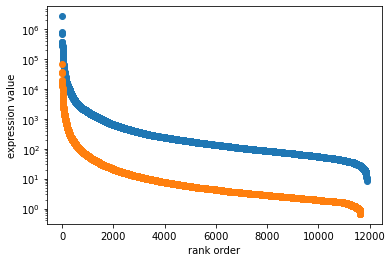

In [155]:
plt.scatter(np.arange(0,len(expression)),sorted(expression,reverse=True))
plt.scatter(np.arange(0,len(heights)),sorted(heights,reverse=True))
plt.ylabel('expression value')
plt.xlabel('rank order')
plt.yscale('log')
plt.show()


In [167]:
lb2_det['Pos'].value_counts().head(50)

1921234    3
1490054    3
77339      3
1145813    3
296947     3
16952      3
1646767    3
1145872    3
77403      3
1490143    3
1921230    3
2812824    3
1876840    3
565315     3
695887     3
1145923    3
1202433    3
1921090    3
16949      3
77565      3
567487     2
1625451    2
234785     2
3301438    2
1985826    2
2674877    2
3774660    2
1724613    2
1144101    2
518388     2
1194184    2
1051218    2
3615583    2
3037873    2
4354411    2
1411286    2
632856     2
2549941    2
2063512    2
2085083    2
709945     2
2620222    2
1715328    2
3540643    2
217127     2
967476     2
503996     2
2871351    2
1618223    2
1667640    2
Name: Pos, dtype: int64

In [165]:
lb2_det[lb2_det['Pos']==1921234]

,Pos,Strand,detCount,Condition,detected,enriched,stepHeight,stepFactor,enrichmentFactor,classCount,...,Secondary,Internal,Antisense,Automated,Manual,Putative sRNA,Putative asRNA,Comment,Sequence -50 nt upstream + TSS (51nt),Overlap with RegulonDB
21207,1921234,-,1,LB_2.0,1,1,1.85,>100,13.63,3,...,1,0,0,1,0,0,1,,TGACCATTTTGCACGCAAACTGGAAAACCTGGCGTCGTCATCTATT...,
21208,1921234,-,1,LB_2.0,1,1,1.85,>100,13.63,3,...,0,1,0,1,0,0,1,,TGACCATTTTGCACGCAAACTGGAAAACCTGGCGTCGTCATCTATT...,
21209,1921234,-,1,LB_2.0,1,1,1.85,>100,13.63,3,...,0,0,1,1,0,0,1,,TGACCATTTTGCACGCAAACTGGAAAACCTGGCGTCGTCATCTATT...,


In [169]:
flb2_det = lb2_det.groupby("Pos").first()
flb2_det[flb2_det["Locus_tag"]!='orphan']

,Strand,detCount,Condition,detected,enriched,stepHeight,stepFactor,enrichmentFactor,classCount,Locus_tag,...,Secondary,Internal,Antisense,Automated,Manual,Putative sRNA,Putative asRNA,Comment,Sequence -50 nt upstream + TSS (51nt),Overlap with RegulonDB
Pos,,,,,,,,,,,,,,,,,,,,,
38,+,1,LB_2.0,1,1,8.43,>100,9.63,1,b0001,...,1,0,0,1,0,0,0,,,X
113,+,3,LB_2.0,1,1,10.27,6.6,11.27,1,b0001,...,1,0,0,1,0,0,0,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,
122,-,2,LB_2.0,1,1,3.13,6.5,12.54,1,b0001,...,0,0,1,1,0,0,1,,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...,
148,+,3,LB_2.0,1,1,154.97,10.96,5.86,1,b0001,...,0,0,0,1,0,0,0,,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...,X
412,+,1,LB_2.0,1,1,24.14,41,12.49,1,b0002,...,0,1,0,1,0,0,0,,CATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCT...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4638618,-,3,LB_2.0,1,1,363.45,3.75,2.55,1,b4402,...,0,0,1,1,0,0,1,,ATTTAGATACGATGATTTCATCAAACTGTTAACGTGCTACAATTGA...,
4638684,+,2,LB_2.0,1,1,3.41,6.5,3.54,1,b4403,...,0,0,0,1,0,0,0,,ACGTTAACAGTTTGATGAAATCATCGTATCTAAATGCTAGCTTTCG...,
4638991,+,2,LB_2.0,1,1,2.37,5.5,2.78,1,b4403,...,0,1,0,1,0,0,0,,TATTTGATCAAGAAGAGTGGCAATATGCGTATAACGATTATTCTGG...,


In [177]:
heights = lb2_det['stepHeight'].values
log_heights = [np.log2(x) for x in heights]

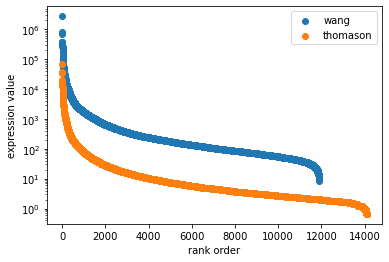

In [182]:
plt.scatter(np.arange(0,len(expression)),sorted(expression,reverse=True),label='wang')
plt.scatter(np.arange(0,len(heights)),sorted(heights,reverse=True),label='thomason')
plt.ylabel('expression value')
plt.xlabel('rank order')
plt.yscale('log')
plt.legend()
plt.show()

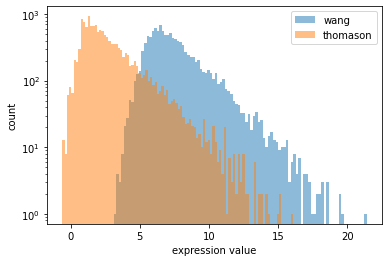

In [183]:
plt.hist(log_expression,bins=100,alpha=0.5,label='wang')
plt.hist(log_heights,bins=100,alpha=0.5,label='thomason')
plt.yscale('log')
plt.xlabel('expression value')
plt.ylabel('count')
plt.legend()
plt.show()

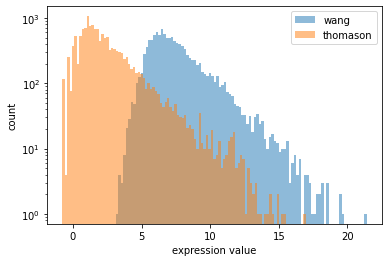

In [200]:
plt.hist(log_expression,bins=100,alpha=0.5,label='wang')
plt.hist([np.log2(x) for x in m63['stepHeight'].values if type(x)==float],bins=100,alpha=0.5,label='thomason')
plt.yscale('log')
plt.xlabel('expression value')
plt.ylabel('count')
plt.legend()
plt.show()

In [191]:
len(m63['stepHeight'].values)

17445

In [192]:
len()

14211

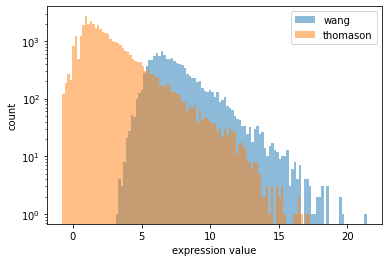

In [201]:
plt.hist(log_expression,bins=100,alpha=0.5,label='wang')
plt.hist([np.log2(x) for x in tdf['stepHeight'].values if type(x)==float],bins=100,alpha=0.5,label='thomason')
plt.yscale('log')
plt.xlabel('expression value')
plt.ylabel('count')
plt.legend()
plt.show()

In [205]:
tdf['seq'] = tdf['Sequence -50 nt upstream + TSS (51nt)'].apply(lambda x: x[:-1])
tdf_in_prom = tdf[tdf['seq'].isin(promoter)]

In [206]:
tdf_in_prom[tdf_in_prom['detected']==1]

,Pos,Strand,detCount,Condition,detected,enriched,stepHeight,stepFactor,enrichmentFactor,classCount,...,Internal,Antisense,Automated,Manual,Putative sRNA,Putative asRNA,Comment,Sequence -50 nt upstream + TSS (51nt),Overlap with RegulonDB,seq
3,113,+,3,M63_0.4,1,1,1.8,4,25.41,1,...,0,0,1,0,0,0,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...
4,113,+,3,LB_0.4,1,1,1.96,2.33,13.27,1,...,0,0,1,0,0,0,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...
5,113,+,3,LB_2.0,1,1,10.27,6.6,11.27,1,...,0,0,1,0,0,0,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...
6,122,-,2,M63_0.4,1,1,1.35,3.33,2.86,1,...,0,1,1,0,0,1,,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...,,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...
8,122,-,2,LB_2.0,1,1,3.13,6.5,12.54,1,...,0,1,1,0,0,1,,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...,,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52325,4638991,+,2,LB_2.0,1,1,2.37,5.5,2.78,1,...,1,0,1,0,0,0,,TATTTGATCAAGAAGAGTGGCAATATGCGTATAACGATTATTCTGG...,,TATTTGATCAAGAAGAGTGGCAATATGCGTATAACGATTATTCTGG...
52331,4639123,-,1,LB_2.0,1,1,1.91,6.5,21.72,1,...,0,1,1,0,0,1,,TCGTGTAACGATTCAGCCAATGTCGGGAAAACTTTAATATTATCAA...,,TCGTGTAACGATTCAGCCAATGTCGGGAAAACTTTAATATTATCAA...
52332,4639136,+,3,M63_0.4,1,1,2.0,>100,2.9,1,...,1,0,1,0,0,0,,AGCCAGCCACCCGCTGGGTCGCACATGGATCTGGTGATATTATTGA...,,AGCCAGCCACCCGCTGGGTCGCACATGGATCTGGTGATATTATTGA...
52333,4639136,+,3,LB_0.4,1,1,1.8,4.5,3.83,1,...,1,0,1,0,0,0,,AGCCAGCCACCCGCTGGGTCGCACATGGATCTGGTGATATTATTGA...,,AGCCAGCCACCCGCTGGGTCGCACATGGATCTGGTGATATTATTGA...


In [215]:
len(tdf_in_prom['stepHeight'].values)

42327

In [214]:
len([x for x in tdf_in_prom['stepHeight'].values if type(x)==float])

33726

In [225]:
tdf_not_null_step = tdf_in_prom[pd.to_numeric(tdf_in_prom['stepHeight'],errors='coerce').notnull()]

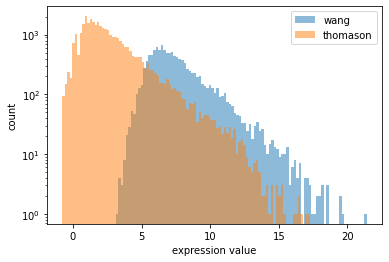

In [226]:
plt.hist(log_expression,bins=100,alpha=0.5,label='wang')
plt.hist([np.log2(x) for x in tdf_not_null_step['stepHeight'].values],bins=100,alpha=0.5,label='thomason')
plt.yscale('log')
plt.xlabel('expression value')
plt.ylabel('count')
plt.legend()
plt.show()

In [236]:
ps = np.load('./seq/promoter.npy')
es = np.load('./seq/gene_expression.npy')
wdf = pd.DataFrame(zip(ps,es),columns=['prom','val'])
wdf['seq'] = wdf['prom'].apply(lambda x: x.upper())
wdf['val'] = wdf['val'].apply(lambda x: x.astype(float))

In [245]:
print(wdf.sort_values('val',ascending=False)[['val','seq']].values[0])

wdf.sort_values('val',ascending=False)[['val','seq']]

[2755441.06 'TTAGAAACCGATCACATACAGCTGCATTTATTAAGGTTATCATCCGTTTC']


,val,seq
5370,2755441.06,TTAGAAACCGATCACATACAGCTGCATTTATTAAGGTTATCATCCG...
10718,820796.70,CGTCAAACATCCTGCTTGAGTTCTGCGCTGTTAACGCGTAATTTAC...
7277,745147.58,ATTATAAATTGTCCGTTGAGCTTCTACCAGCAAATACCTATAGTGG...
4405,724334.04,CCATCAAAAAAATATTCTCAACATAAAAAACTTTGTGTAATACTTG...
11152,390218.55,AAAATCATCAGATTCCCATCATTTTTGGCGATGTTGTCTATTATTA...
...,...,...
5966,10.17,CAGCGCGTTTGTGACGGATTATTTCGATGACGCCCGGCAAAATAGA...
1465,10.15,CAGCACGTCTTAAGCAAGAACATGCTGCGGTTGGATGCTATTTTTT...
3341,10.06,AAAAGAGTAATCCCAGCCCGTACATGTTTTTTATGCAGGATAATGA...
7699,9.91,CGGGTGAAAAAGCAATGGATTGTTGGCACGGCACTGCTTATGTTGA...


In [247]:
print(tdf_not_null_step.sort_values('stepHeight',ascending=False)[['stepHeight','seq']].values[0])


tdf_not_null_step.sort_values('stepHeight',ascending=False)[['stepHeight','seq']]

[161055.36 'TGTAGGAAAAATTGTTTGACTTATAAGTCTCAGAAAGTAATATGTGCGCC']


,stepHeight,seq
30706,161055.36,TGTAGGAAAAATTGTTTGACTTATAAGTCTCAGAAAGTAATATGTG...
30705,127395.25,TGTAGGAAAAATTGTTTGACTTATAAGTCTCAGAAAGTAATATGTG...
32026,101472.57,ATTATAAATTGTCCGTTGAGCTTCTACCAGCAAATACCTATAGTGG...
37987,92912.25,GATCAAAAAAATACTTGTGCAAAAAATTGGGATCCCTATAATGCGC...
29629,87669.01,TTTATATTTTTCGCTTGTCAGGCCGGAATAACTCCCTATAATGCGC...
...,...,...
39928,0.58,GGCGCGTATTCGTGGCGAATCTGTGACACCGAAAATGTTAGATTTA...
39927,0.58,GGCGCGTATTCGTGGCGAATCTGTGACACCGAAAATGTTAGATTTA...
51213,0.58,CTGGTTTTGTTGTATGGATTGCGTGATTTTTGATCTGGTATAACAG...
15912,0.58,GATTTGTTATGCCTGGTGGCTGGACTGACAGGGGGCGTTATGCTTA...


In [244]:
tdf_not_null_step[tdf_not_null_step['seq']=='TTAGAAACCGATCACATACAGCTGCATTTATTAAGGTTATCATCCGTTTC']

,Pos,Strand,detCount,Condition,detected,enriched,stepHeight,stepFactor,enrichmentFactor,classCount,...,Internal,Antisense,Automated,Manual,Putative sRNA,Putative asRNA,Comment,Sequence -50 nt upstream + TSS (51nt),Overlap with RegulonDB,seq
23871,2165138,+,3,M63_0.4,1,1,1042.02,53.41,8.47,1,...,0,0,1,0,0,0,,TTAGAAACCGATCACATACAGCTGCATTTATTAAGGTTATCATCCG...,X,TTAGAAACCGATCACATACAGCTGCATTTATTAAGGTTATCATCCG...
23872,2165138,+,3,LB_0.4,1,1,6734.35,28.38,5.29,1,...,0,0,1,0,0,0,,TTAGAAACCGATCACATACAGCTGCATTTATTAAGGTTATCATCCG...,X,TTAGAAACCGATCACATACAGCTGCATTTATTAAGGTTATCATCCG...
23873,2165138,+,3,LB_2.0,1,1,69035.44,43.73,13.92,1,...,0,0,1,0,0,0,,TTAGAAACCGATCACATACAGCTGCATTTATTAAGGTTATCATCCG...,X,TTAGAAACCGATCACATACAGCTGCATTTATTAAGGTTATCATCCG...


In [ ]:
# seq with highest score in wang is not the highest scoring in thomason

In [248]:
wdf[wdf['seq']=='TGTAGGAAAAATTGTTTGACTTATAAGTCTCAGAAAGTAATATGTGCGCC']

,prom,val,seq
6967,tgtaggaaaaattgtttgacttataagtctcagaaagtaatatgtg...,281907.24,TGTAGGAAAAATTGTTTGACTTATAAGTCTCAGAAAGTAATATGTG...


In [249]:
jdf = wdf.merge(tdf_not_null_step,on='seq')

In [255]:
lb_jdf = jdf[jdf['Condition']=="LB_2.0"]
lb_jdf

,prom,val,seq,Pos,Strand,detCount,Condition,detected,enriched,stepHeight,...,Secondary,Internal,Antisense,Automated,Manual,Putative sRNA,Putative asRNA,Comment,Sequence -50 nt upstream + TSS (51nt),Overlap with RegulonDB
2,atagcagcttctgaactggttacctgccgtgagtaaattaaaattt...,1951.41,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,113,+,3,LB_2.0,1,1,10.27,...,1,0,0,1,0,0,0,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,
4,taatttttatctgtctgtgcgctatgcctatattggttaaagtatt...,36.84,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...,122,-,2,LB_2.0,1,1,3.13,...,0,0,1,1,0,0,1,,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...,
7,aattaaaattttattgacttaggtcactaaatactttaaccaatat...,2355.75,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...,148,+,3,LB_2.0,1,1,154.97,...,0,0,0,1,0,0,0,,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...,X
8,catcagtggcaaatgcagaacgttttctgcgtgttgccgatattct...,1262.81,CATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCT...,412,+,1,LB_2.0,1,1,24.14,...,0,1,0,1,0,0,0,,CATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCT...,
11,gcaccaatgagcgtacctggtgcttgaggatttccggtatttttaa...,203.37,GCACCAATGAGCGTACCTGGTGCTTGAGGATTTCCGGTATTTTTAA...,1176,-,3,LB_2.0,1,1,9.78,...,0,0,1,1,0,0,1,,GCACCAATGAGCGTACCTGGTGCTTGAGGATTTCCGGTATTTTTAA...,
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33716,tataaaaaataaatctcgacaattggattcaccacgtttattagtt...,1531.41,TATAAAAAATAAATCTCGACAATTGGATTCACCACGTTTATTAGTT...,4638712,-,3,LB_2.0,1,1,36.35,...,0,0,0,1,0,0,0,,TATAAAAAATAAATCTCGACAATTGGATTCACCACGTTTATTAGTT...,
33719,gtcgcagaaaaagccctttacttagcttaaaaaaggctaaactatt...,3436.56,GTCGCAGAAAAAGCCCTTTACTTAGCTTAAAAAAGGCTAAACTATT...,4638826,-,3,LB_2.0,1,1,110.71,...,0,0,0,1,0,0,0,,GTCGCAGAAAAAGCCCTTTACTTAGCTTAAAAAAGGCTAAACTATT...,
33721,tatttgatcaagaagagtggcaatatgcgtataacgattattctgg...,55.06,TATTTGATCAAGAAGAGTGGCAATATGCGTATAACGATTATTCTGG...,4638991,+,2,LB_2.0,1,1,2.37,...,0,1,0,1,0,0,0,,TATTTGATCAAGAAGAGTGGCAATATGCGTATAACGATTATTCTGG...,
33722,tcgtgtaacgattcagccaatgtcgggaaaactttaatattatcaa...,53.28,TCGTGTAACGATTCAGCCAATGTCGGGAAAACTTTAATATTATCAA...,4639123,-,1,LB_2.0,1,1,1.91,...,0,0,1,1,0,0,1,,TCGTGTAACGATTCAGCCAATGTCGGGAAAACTTTAATATTATCAA...,


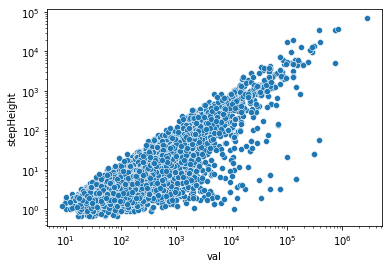

In [254]:
sns.scatterplot(data=lb_jdf,x='val',y='stepHeight')
plt.yscale('log')
plt.xscale('log')

In [ ]:
# these appear to be differen value assignments?

# Save something to play wtih in a model

In [330]:
cols = ['seq','val','stepHeight','Pos','Primary','Secondary','Internal','Antisense']
colst = ['seq','Product','stepHeight','Pos','Primary','Secondary','Internal','Antisense']

In [268]:
a = lb_jdf[(lb_jdf['Primary']==1)|(lb_jdf['Secondary']==1)|lb_jdf['Internal']==1]
a[a['Pos']==1028090][cols]

,seq,val,stepHeight,Pos,Primary,Secondary,Internal,Antisense
7323,AATCATCGCGGATGCCGCAATTGATGCCGGTCGTGATGTACAATTT...,4800.18,169.04,1028090,1,0,0,0
7324,AATCATCGCGGATGCCGCAATTGATGCCGGTCGTGATGTACAATTT...,4800.18,169.04,1028090,0,0,1,0


In [269]:
a

,prom,val,seq,Pos,Strand,detCount,Condition,detected,enriched,stepHeight,...,Secondary,Internal,Antisense,Automated,Manual,Putative sRNA,Putative asRNA,Comment,Sequence -50 nt upstream + TSS (51nt),Overlap with RegulonDB
2,atagcagcttctgaactggttacctgccgtgagtaaattaaaattt...,1951.41,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,113,+,3,LB_2.0,1,1,10.27,...,1,0,0,1,0,0,0,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,
7,aattaaaattttattgacttaggtcactaaatactttaaccaatat...,2355.75,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...,148,+,3,LB_2.0,1,1,154.97,...,0,0,0,1,0,0,0,,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...,X
8,catcagtggcaaatgcagaacgttttctgcgtgttgccgatattct...,1262.81,CATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCT...,412,+,1,LB_2.0,1,1,24.14,...,0,1,0,1,0,0,0,,CATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCT...,
16,gacccgcgagatgatctttctggtatggatgtggcgcgtaaactat...,321.78,GACCCGCGAGATGATCTTTCTGGTATGGATGTGGCGCGTAAACTAT...,2391,+,2,LB_2.0,1,1,11.55,...,0,1,0,1,0,0,0,,GACCCGCGAGATGATCTTTCTGGTATGGATGTGGCGCGTAAACTAT...,
21,gcgtggcgaaggcccgtgatgaaggaaaagttttgcgctatgttgg...,4936.67,GCGTGGCGAAGGCCCGTGATGAAGGAAAAGTTTTGCGCTATGTTGG...,2581,+,3,LB_2.0,1,1,240.04,...,0,0,0,1,0,0,0,,GCGTGGCGAAGGCCCGTGATGAAGGAAAAGTTTTGCGCTATGTTGG...,X
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33701,gcaattacgtactttagtcatgttacgccgatcatgttaatttgca...,2258.90,GCAATTACGTACTTTAGTCATGTTACGCCGATCATGTTAATTTGCA...,4638395,-,3,LB_2.0,1,0,4.0,...,0,0,0,1,0,0,1,,GCAATTACGTACTTTAGTCATGTTACGCCGATCATGTTAATTTGCA...,
33705,cctgcctgatgcatgctgcaaattaacatgatcggcgtaacatgac...,245.20,CCTGCCTGATGCATGCTGCAAATTAACATGATCGGCGTAACATGAC...,4638434,+,3,LB_2.0,1,1,7.14,...,0,1,0,1,0,0,0,,CCTGCCTGATGCATGCTGCAAATTAACATGATCGGCGTAACATGAC...,
33713,acgttaacagtttgatgaaatcatcgtatctaaatgctagctttcg...,298.83,ACGTTAACAGTTTGATGAAATCATCGTATCTAAATGCTAGCTTTCG...,4638684,+,2,LB_2.0,1,1,3.41,...,0,0,0,1,0,0,0,,ACGTTAACAGTTTGATGAAATCATCGTATCTAAATGCTAGCTTTCG...,
33721,tatttgatcaagaagagtggcaatatgcgtataacgattattctgg...,55.06,TATTTGATCAAGAAGAGTGGCAATATGCGTATAACGATTATTCTGG...,4638991,+,2,LB_2.0,1,1,2.37,...,0,1,0,1,0,0,0,,TATTTGATCAAGAAGAGTGGCAATATGCGTATAACGATTATTCTGG...,


In [273]:
lb_jdf[lb_jdf['Pos']==919438][cols]

,seq,val,stepHeight,Pos,Primary,Secondary,Internal,Antisense
6541,CTGTCGGCGTTAGGCGATCCGGTTGGCGATAATCGTTATAAAGTCA...,53.68,2.36,919438,1,0,0,0
6542,CTGTCGGCGTTAGGCGATCCGGTTGGCGATAATCGTTATAAAGTCA...,53.68,2.36,919438,0,0,1,0


In [ ]:
# 1028090    2
# 793240     2
# 3433087    2
# 3363119    2
# 919438     2

In [283]:
lb2_det[(lb2_det['Primary']==1)|(lb2_det['Secondary']==1)][colst]

,seq,stepHeight,Pos,Primary,Secondary,Internal,Antisense
2,,8.43,38,0,1,0,0
5,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,10.27,113,0,1,0,0
11,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...,154.97,148,1,0,0,0
28,GCGTGGCGAAGGCCCGTGATGAAGGAAAAGTTTTGCGCTATGTTGG...,240.04,2581,1,0,0,0
50,AATGACAGGGAAAAAGGAGAAATTCTCAATAAATGCGGTAACTTAG...,5.52,5147,1,0,0,0
...,...,...,...,...,...,...,...
52265,TGCTGTTTTAGCATTCAGTGTTTTTTTCTTAGTAGAGTATGTTTTA...,6.9,4633447,0,1,0,0
52268,ACGGAAATAAAAGTATTGAGATTTTGTTCTTAATCAATATGTTATT...,9.11,4633500,0,1,0,0
52273,AATGTCACCTGTTATGTGAGCCGGGCGAAAACCGGTGGTATTAAAG...,9.29,4633747,1,0,0,0
52303,GCAATTACGTACTTTAGTCATGTTACGCCGATCATGTTAATTTGCA...,4.0,4638395,1,0,0,0


In [282]:
lb2_det

,Pos,Strand,detCount,Condition,detected,enriched,stepHeight,stepFactor,enrichmentFactor,classCount,...,Internal,Antisense,Automated,Manual,Putative sRNA,Putative asRNA,Comment,Sequence -50 nt upstream + TSS (51nt),Overlap with RegulonDB,seq
2,38,+,1,LB_2.0,1,1,8.43,>100,9.63,1,...,0,0,1,0,0,0,,,X,
5,113,+,3,LB_2.0,1,1,10.27,6.6,11.27,1,...,0,0,1,0,0,0,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...
8,122,-,2,LB_2.0,1,1,3.13,6.5,12.54,1,...,0,1,1,0,0,1,,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...,,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...
11,148,+,3,LB_2.0,1,1,154.97,10.96,5.86,1,...,0,0,1,0,0,0,,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...,X,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...
14,412,+,1,LB_2.0,1,1,24.14,41,12.49,1,...,1,0,1,0,0,0,,CATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCT...,,CATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52319,4638712,-,3,LB_2.0,1,1,36.35,6.76,2.63,1,...,0,0,1,0,0,0,,TATAAAAAATAAATCTCGACAATTGGATTCACCACGTTTATTAGTT...,,TATAAAAAATAAATCTCGACAATTGGATTCACCACGTTTATTAGTT...
52322,4638826,-,3,LB_2.0,1,1,110.71,12.04,3.42,1,...,0,0,1,0,0,0,,GTCGCAGAAAAAGCCCTTTACTTAGCTTAAAAAAGGCTAAACTATT...,,GTCGCAGAAAAAGCCCTTTACTTAGCTTAAAAAAGGCTAAACTATT...
52325,4638991,+,2,LB_2.0,1,1,2.37,5.5,2.78,1,...,1,0,1,0,0,0,,TATTTGATCAAGAAGAGTGGCAATATGCGTATAACGATTATTCTGG...,,TATTTGATCAAGAAGAGTGGCAATATGCGTATAACGATTATTCTGG...
52331,4639123,-,1,LB_2.0,1,1,1.91,6.5,21.72,1,...,0,1,1,0,0,1,,TCGTGTAACGATTCAGCCAATGTCGGGAAAACTTTAATATTATCAA...,,TCGTGTAACGATTCAGCCAATGTCGGGAAAACTTTAATATTATCAA...


In [304]:
s = tdf_not_null_step[tdf_not_null_step['Condition']=='LB_2.0'].sort_values('Pos')[colst]['seq'].values

In [305]:
print(len(s))
print(len(set(s)))

14098
11884


In [309]:
len(set(s).intersection(promoter))

11884

In [313]:
# recreated wang df
rdf = tdf[tdf['Condition']=='LB_2.0']
rdf = rdf[pd.to_numeric(rdf['stepHeight'],errors='coerce').notnull()]
rdf

,Pos,Strand,detCount,Condition,detected,enriched,stepHeight,stepFactor,enrichmentFactor,classCount,...,Internal,Antisense,Automated,Manual,Putative sRNA,Putative asRNA,Comment,Sequence -50 nt upstream + TSS (51nt),Overlap with RegulonDB,seq
2,38,+,1,LB_2.0,1,1,8.43,>100,9.63,1,...,0,0,1,0,0,0,,,X,
5,113,+,3,LB_2.0,1,1,10.27,6.6,11.27,1,...,0,0,1,0,0,0,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...
8,122,-,2,LB_2.0,1,1,3.13,6.5,12.54,1,...,0,1,1,0,0,1,,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...,,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...
11,148,+,3,LB_2.0,1,1,154.97,10.96,5.86,1,...,0,0,1,0,0,0,,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...,X,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...
14,412,+,1,LB_2.0,1,1,24.14,41,12.49,1,...,1,0,1,0,0,0,,CATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCT...,,CATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCT...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52319,4638712,-,3,LB_2.0,1,1,36.35,6.76,2.63,1,...,0,0,1,0,0,0,,TATAAAAAATAAATCTCGACAATTGGATTCACCACGTTTATTAGTT...,,TATAAAAAATAAATCTCGACAATTGGATTCACCACGTTTATTAGTT...
52322,4638826,-,3,LB_2.0,1,1,110.71,12.04,3.42,1,...,0,0,1,0,0,0,,GTCGCAGAAAAAGCCCTTTACTTAGCTTAAAAAAGGCTAAACTATT...,,GTCGCAGAAAAAGCCCTTTACTTAGCTTAAAAAAGGCTAAACTATT...
52325,4638991,+,2,LB_2.0,1,1,2.37,5.5,2.78,1,...,1,0,1,0,0,0,,TATTTGATCAAGAAGAGTGGCAATATGCGTATAACGATTATTCTGG...,,TATTTGATCAAGAAGAGTGGCAATATGCGTATAACGATTATTCTGG...
52331,4639123,-,1,LB_2.0,1,1,1.91,6.5,21.72,1,...,0,1,1,0,0,1,,TCGTGTAACGATTCAGCCAATGTCGGGAAAACTTTAATATTATCAA...,,TCGTGTAACGATTCAGCCAATGTCGGGAAAACTTTAATATTATCAA...


In [354]:
rdf['seq'].value_counts().head(20)

CTCTCCGATAACATGGTGTATACGGAGAAGCACATCCGTATCATCAGTGT    12
TGAATCTCCAGACAACCAATATCACTTAAATAAGTGATAGTCTTAATACT     9
GACGTCTGCTGATTTTGCTGTTTACTGCGCCAGTTGTAGAGTTGTGATTC     8
TGGTTCTGAATGGAAGGGCCATCGCTCAACGGATAAAAGGTACTCCGGGG     7
AAGTCATCATGGCCCTTACGACCAGGGCTACACACGTGCTACAATGGCGC     7
CGAGCGATAACCCAGCGCACTATGCGGATGCCATTCGTTATAATGCTCGA     7
AATGCGGGCAACGGTGTTTAATTATATCGAATGTGATTACAATCGGTGGC     7
CTATCCTACACATCAAGGCTCAATGTTCAGTGTCAAGCTATAGTAAAGGT     7
GACGAACCGATGACTGGATGGATGGCCGCCGCAGTCGTCACACTGATGAT     6
GGCATGCTGGAGGTATCAGAAGTGCGAATGCTGACATAAGTAACGATAAA     6
CGAGGTTACCGACTGCGGCCTGAGTTTTTTAAGTGACGTAAAATCGTGTT     6
CCTGATACAGATTAAATCAGAACGCAGAAGCGGTCTGATAAAACAGAATT     6
TTCGGCAGTACTTTCCTAAAAAGACATGTCTTGCCCAATATACTCAACAT     6
GTTTAGCTGAGCAGCAACCAGATCTAGTTCATGTTGAGTATATTGGGCAA     5
TAATTAAACACCGTTGCCCGCATTATTTCCCGGCTGATAAAGTGTTCTCC     5
AACTGGAAAACCGACATGTTGATTTCCTGAAACGGGATATCATCAAAGCC     4
CAAACTCTTCAATTTAAAAGTTTGATGCTCAAAGAATTAAACTTCGTAAT     4
CATATAGCCGCCTTGTTGTAATGACAACATT

In [361]:
rdf[rdf['seq']=='TGAATCTCCAGACAACCAATATCACTTAAATAAGTGATAGTCTTAATACT'][colst]

,seq,Product,stepHeight,Pos,Primary,Secondary,Internal,Antisense
4309,TGAATCTCCAGACAACCAATATCACTTAAATAAGTGATAGTCTTAA...,IS2 repressor TnpA,4.41,380547,1,0,0,0
4310,TGAATCTCCAGACAACCAATATCACTTAAATAAGTGATAGTCTTAA...,pseudo,4.41,380547,0,0,0,1
16243,TGAATCTCCAGACAACCAATATCACTTAAATAAGTGATAGTCTTAA...,IS2 repressor TnpA,4.36,1467201,1,0,0,0
16244,TGAATCTCCAGACAACCAATATCACTTAAATAAGTGATAGTCTTAA...,pseudo,4.36,1467201,0,0,0,1
22900,TGAATCTCCAGACAACCAATATCACTTAAATAAGTGATAGTCTTAA...,IS2 repressor TnpA,4.36,2068232,1,0,0,0
22901,TGAATCTCCAGACAACCAATATCACTTAAATAAGTGATAGTCTTAA...,pseudo,4.36,2068232,0,0,0,1
32666,TGAATCTCCAGACAACCAATATCACTTAAATAAGTGATAGTCTTAA...,IS2 repressor TnpA,4.36,2995650,1,0,0,0
34946,TGAATCTCCAGACAACCAATATCACTTAAATAAGTGATAGTCTTAA...,IS2 repressor TnpA,4.24,3184181,1,0,0,0
50642,TGAATCTCCAGACAACCAATATCACTTAAATAAGTGATAGTCTTAA...,IS2 repressor TnpA,4.41,4496267,1,0,0,0


In [334]:
q = set(rdf['seq'].values)
missing_wang = q - promoter
rest_wang = q.intersection(promoter)

In [341]:
rdf['in_wang'] = rdf['seq'].apply(lambda x: True if x in promoter else False)
rdf['logStepHeight'] = rdf['stepHeight'].apply(lambda x: np.log2(x))

In [336]:
missing = rdf[rdf['seq'].isin(missing_wang)]['stepHeight'].values
rest = rdf[rdf['seq'].isin(rest_wang)]['stepHeight'].values

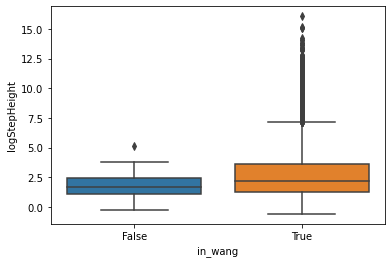

In [345]:
sns.boxplot(data=rdf,x='in_wang',y='logStepHeight')
plt.show()

/home/ubuntu/anaconda3/envs/torchp/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/home/ubuntu/anaconda3/envs/torchp/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


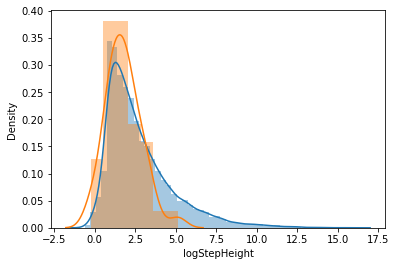

In [353]:
sns.distplot(rdf[rdf['in_wang']==True]['logStepHeight'])
sns.distplot(rdf[rdf['in_wang']==False]['logStepHeight'])
plt.show()

In [359]:
rdf[(rdf['Primary']==1)|(rdf['Secondary']==1)|(rdf['Internal']==1)]

,Pos,Strand,detCount,Condition,detected,enriched,stepHeight,stepFactor,enrichmentFactor,classCount,...,Automated,Manual,Putative sRNA,Putative asRNA,Comment,Sequence -50 nt upstream + TSS (51nt),Overlap with RegulonDB,seq,in_wang,logStepHeight
2,38,+,1,LB_2.0,1,1,8.43,>100,9.63,1,...,1,0,0,0,,,X,,False,3.075533
5,113,+,3,LB_2.0,1,1,10.27,6.6,11.27,1,...,1,0,0,0,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,True,3.360364
11,148,+,3,LB_2.0,1,1,154.97,10.96,5.86,1,...,1,0,0,0,,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...,X,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...,True,7.275845
14,412,+,1,LB_2.0,1,1,24.14,41,12.49,1,...,1,0,0,0,,CATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCT...,,CATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCT...,True,4.593354
23,2391,+,2,LB_2.0,1,1,11.55,5.33,9.33,1,...,1,0,0,0,,GACCCGCGAGATGATCTTTCTGGTATGGATGTGGCGCGTAAACTAT...,,GACCCGCGAGATGATCTTTCTGGTATGGATGTGGCGCGTAAACTAT...,True,3.529821
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52303,4638395,-,3,LB_2.0,1,0,4.0,2.38,1.52,2,...,1,0,0,1,,GCAATTACGTACTTTAGTCATGTTACGCCGATCATGTTAATTTGCA...,,GCAATTACGTACTTTAGTCATGTTACGCCGATCATGTTAATTTGCA...,True,2.000000
52307,4638434,+,3,LB_2.0,1,1,7.14,>100,15.33,1,...,1,0,0,0,,CCTGCCTGATGCATGCTGCAAATTAACATGATCGGCGTAACATGAC...,,CCTGCCTGATGCATGCTGCAAATTAACATGATCGGCGTAACATGAC...,True,2.835924
52316,4638684,+,2,LB_2.0,1,1,3.41,6.5,3.54,1,...,1,0,0,0,,ACGTTAACAGTTTGATGAAATCATCGTATCTAAATGCTAGCTTTCG...,,ACGTTAACAGTTTGATGAAATCATCGTATCTAAATGCTAGCTTTCG...,True,1.769772
52325,4638991,+,2,LB_2.0,1,1,2.37,5.5,2.78,1,...,1,0,0,0,,TATTTGATCAAGAAGAGTGGCAATATGCGTATAACGATTATTCTGG...,,TATTTGATCAAGAAGAGTGGCAATATGCGTATAACGATTATTCTGG...,True,1.244887


In [366]:
rdf

,Pos,Strand,detCount,Condition,detected,enriched,stepHeight,stepFactor,enrichmentFactor,classCount,...,Automated,Manual,Putative sRNA,Putative asRNA,Comment,Sequence -50 nt upstream + TSS (51nt),Overlap with RegulonDB,seq,in_wang,logStepHeight
2,38,+,1,LB_2.0,1,1,8.43,>100,9.63,1,...,1,0,0,0,,,X,,False,3.075533
5,113,+,3,LB_2.0,1,1,10.27,6.6,11.27,1,...,1,0,0,0,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,True,3.360364
8,122,-,2,LB_2.0,1,1,3.13,6.5,12.54,1,...,1,0,0,1,,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...,,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...,True,1.646163
11,148,+,3,LB_2.0,1,1,154.97,10.96,5.86,1,...,1,0,0,0,,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...,X,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...,True,7.275845
14,412,+,1,LB_2.0,1,1,24.14,41,12.49,1,...,1,0,0,0,,CATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCT...,,CATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCT...,True,4.593354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52319,4638712,-,3,LB_2.0,1,1,36.35,6.76,2.63,1,...,1,0,0,0,,TATAAAAAATAAATCTCGACAATTGGATTCACCACGTTTATTAGTT...,,TATAAAAAATAAATCTCGACAATTGGATTCACCACGTTTATTAGTT...,True,5.183883
52322,4638826,-,3,LB_2.0,1,1,110.71,12.04,3.42,1,...,1,0,0,0,,GTCGCAGAAAAAGCCCTTTACTTAGCTTAAAAAAGGCTAAACTATT...,,GTCGCAGAAAAAGCCCTTTACTTAGCTTAAAAAAGGCTAAACTATT...,True,6.790642
52325,4638991,+,2,LB_2.0,1,1,2.37,5.5,2.78,1,...,1,0,0,0,,TATTTGATCAAGAAGAGTGGCAATATGCGTATAACGATTATTCTGG...,,TATTTGATCAAGAAGAGTGGCAATATGCGTATAACGATTATTCTGG...,True,1.244887
52331,4639123,-,1,LB_2.0,1,1,1.91,6.5,21.72,1,...,1,0,0,1,,TCGTGTAACGATTCAGCCAATGTCGGGAAAACTTTAATATTATCAA...,,TCGTGTAACGATTCAGCCAATGTCGGGAAAACTTTAATATTATCAA...,True,0.933573


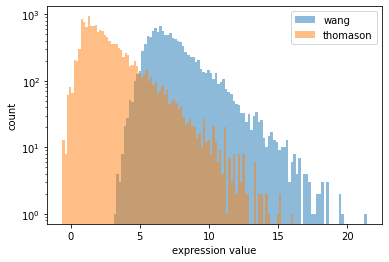

In [367]:
plt.hist(log_expression,bins=100,alpha=0.5,label='wang')
plt.hist(rdf['logStepHeight'],bins=100,alpha=0.5,label='thomason')
plt.yscale('log')
plt.xlabel('expression value')
plt.ylabel('count')
plt.legend()
plt.show()

In [374]:
jjdf = rdf[rdf['in_wang']==True].merge(wdf,on='seq')
jjdf['log_val'] = jjdf['val'].apply(lambda x: np.log2(x))

Text(0, 0.5, 'Thomason et al stepHeight')

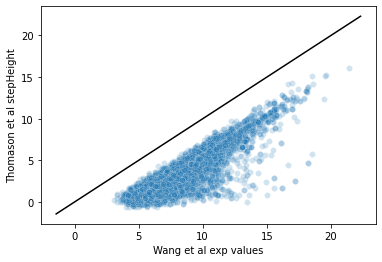

In [381]:
sns.scatterplot(data=jjdf,x='log_val',y='logStepHeight',alpha=0.2)
lims = [
    np.min([plt.xlim(), plt.ylim()]),  # min of both axes
    np.max([plt.xlim(), plt.ylim()]),  # max of both axes
]
plt.plot(lims, lims, 'k-')
plt.xlabel("Wang et al exp values")
plt.ylabel("Thomason et al stepHeight")

In [382]:
## whatever, I don't know why these numbers are the same.

In [383]:
rdf
rdf.to_csv('thomason_lb2_not_null.tsv',sep='\t')

,Pos,Strand,detCount,Condition,detected,enriched,stepHeight,stepFactor,enrichmentFactor,classCount,...,Automated,Manual,Putative sRNA,Putative asRNA,Comment,Sequence -50 nt upstream + TSS (51nt),Overlap with RegulonDB,seq,in_wang,logStepHeight
2,38,+,1,LB_2.0,1,1,8.43,>100,9.63,1,...,1,0,0,0,,,X,,False,3.075533
5,113,+,3,LB_2.0,1,1,10.27,6.6,11.27,1,...,1,0,0,0,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,,ATAGCAGCTTCTGAACTGGTTACCTGCCGTGAGTAAATTAAAATTT...,True,3.360364
8,122,-,2,LB_2.0,1,1,3.13,6.5,12.54,1,...,1,0,0,1,,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...,,TAATTTTTATCTGTCTGTGCGCTATGCCTATATTGGTTAAAGTATT...,True,1.646163
11,148,+,3,LB_2.0,1,1,154.97,10.96,5.86,1,...,1,0,0,0,,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...,X,AATTAAAATTTTATTGACTTAGGTCACTAAATACTTTAACCAATAT...,True,7.275845
14,412,+,1,LB_2.0,1,1,24.14,41,12.49,1,...,1,0,0,0,,CATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCT...,,CATCAGTGGCAAATGCAGAACGTTTTCTGCGTGTTGCCGATATTCT...,True,4.593354
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
52319,4638712,-,3,LB_2.0,1,1,36.35,6.76,2.63,1,...,1,0,0,0,,TATAAAAAATAAATCTCGACAATTGGATTCACCACGTTTATTAGTT...,,TATAAAAAATAAATCTCGACAATTGGATTCACCACGTTTATTAGTT...,True,5.183883
52322,4638826,-,3,LB_2.0,1,1,110.71,12.04,3.42,1,...,1,0,0,0,,GTCGCAGAAAAAGCCCTTTACTTAGCTTAAAAAAGGCTAAACTATT...,,GTCGCAGAAAAAGCCCTTTACTTAGCTTAAAAAAGGCTAAACTATT...,True,6.790642
52325,4638991,+,2,LB_2.0,1,1,2.37,5.5,2.78,1,...,1,0,0,0,,TATTTGATCAAGAAGAGTGGCAATATGCGTATAACGATTATTCTGG...,,TATTTGATCAAGAAGAGTGGCAATATGCGTATAACGATTATTCTGG...,True,1.244887
52331,4639123,-,1,LB_2.0,1,1,1.91,6.5,21.72,1,...,1,0,0,1,,TCGTGTAACGATTCAGCCAATGTCGGGAAAACTTTAATATTATCAA...,,TCGTGTAACGATTCAGCCAATGTCGGGAAAACTTTAATATTATCAA...,True,0.933573


In [387]:
rdf.groupby('seq').first().reset_index()[]

,seq,Pos,Strand,detCount,Condition,detected,enriched,stepHeight,stepFactor,enrichmentFactor,...,Antisense,Automated,Manual,Putative sRNA,Putative asRNA,Comment,Sequence -50 nt upstream + TSS (51nt),Overlap with RegulonDB,in_wang,logStepHeight
0,,38,+,1,LB_2.0,1,1,8.43,>100,9.63,...,0,1,0,0,0,,,X,False,3.075533
1,AAAAAAAACAACAGAGGACTAAACCGTGGCTTTTGCAATACAATTC...,2481542,+,3,LB_2.0,1,1,3.48,>100,7.57,...,0,1,0,0,0,,AAAAAAAACAACAGAGGACTAAACCGTGGCTTTTGCAATACAATTC...,,True,1.799087
2,AAAAAAAAGCGGCCTATGGCGCACTGGCGGATGTGCTGGATAATGA...,844523,-,3,LB_2.0,1,1,1.85,>100,6,...,0,1,0,0,0,,AAAAAAAAGCGGCCTATGGCGCACTGGCGGATGTGCTGGATAATGA...,,True,0.887525
3,AAAAAAAGCCCGTCCAGTGGCGGACGGGCAAACAAGGGTAACATAG...,836709,+,2,LB_2.0,1,1,5.40,>100,3.41,...,0,1,0,0,0,,AAAAAAAGCCCGTCCAGTGGCGGACGGGCAAACAAGGGTAACATAG...,,True,2.432959
4,AAAAAAAGGTTGCATGAAAACGCGAGCGGAGTATAGTGCGCATCCA...,2945409,+,1,LB_2.0,1,1,1215.24,29.67,35.32,...,0,1,0,0,0,,AAAAAAAGGTTGCATGAAAACGCGAGCGGAGTATAGTGCGCATCCA...,,True,10.247026
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11914,TTTTTTGCACAACCGCAGAACTTTTCCGCAGGGCATCAGTCTTAAT...,887280,-,3,LB_2.0,1,1,827.59,>100,21.31,...,0,1,0,0,1,,TTTTTTGCACAACCGCAGAACTTTTCCGCAGGGCATCAGTCTTAAT...,X,True,9.692772
11915,TTTTTTGCACACTTATGCAACGGAATACGCGCCGATATATCATTGT...,1905782,+,2,LB_2.0,1,1,2.79,>100,10.9,...,0,1,0,0,0,,TTTTTTGCACACTTATGCAACGGAATACGCGCCGATATATCATTGT...,,True,1.480265
11916,TTTTTTTACTCCCGTCAGCGCGTTACCCCAATTGTAGATAAAATTG...,1605320,-,3,LB_2.0,1,1,3.42,>100,>100,...,1,1,0,0,1,,TTTTTTTACTCCCGTCAGCGCGTTACCCCAATTGTAGATAAAATTG...,,True,1.773996
11917,TTTTTTTAGCGATGATAAAAAATCTCACCGTCGTAGGCTTTAATGA...,2185275,-,1,LB_2.0,1,1,1.63,7.5,>100,...,1,1,0,0,1,,TTTTTTTAGCGATGATAAAAAATCTCACCGTCGTAGGCTTTAATGA...,,True,0.704872
